# AIDM7330 Basic Programming for Data Science

# Audio Processing in Python

Python include some libraries for basic audio and wave processing. Difficult to manage, but we can find higher level libraries that facilitate the task.


# Librosa

Library for feature extraction from audio files. Used to prepare data for Machine Learning algorithms.

https://librosa.github.io/librosa/tutorial.html#

In [ ]:
# Install library using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa

## Loading an audio file

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=81d68211c3d770e97e7103d1dcfbb719b271860f76305a2604387c815cfb05f0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
#path to data directory
dataPath = drivePath + '/MyDrive/Colab Notebooks/data' + "/"

In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
doc = 'monkey2.wav'
fullURL = baseURL + doc

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data//monkey2.wav


In [ ]:
import librosa

In [ ]:
x , sr = librosa.load(fileName)#x-value that pretend the song,sr:specific time extraction from song
print(type(x), type(sr))
print(sr)

<class 'numpy.ndarray'> <class 'int'>
22050


`.load` loads an audio file and decodes it into a 1-dimensional array which is a time series `x` , and `sr` is a sampling rate of `x` . Default `sr` is 22kHz.

We can override the `sr` by:

In [ ]:
x , sr = librosa.load(fileName, sr=44100)
print(sr)

44100


## Playing an audio file

In [ ]:
import IPython.display as ipd
ipd.Audio(fileName)

Output hidden; open in https://colab.research.google.com to view.

`IPython.display` allow us to play audio on jupyter notebook directly. It has a very simple interface with some basic buttons.

## Display waveform

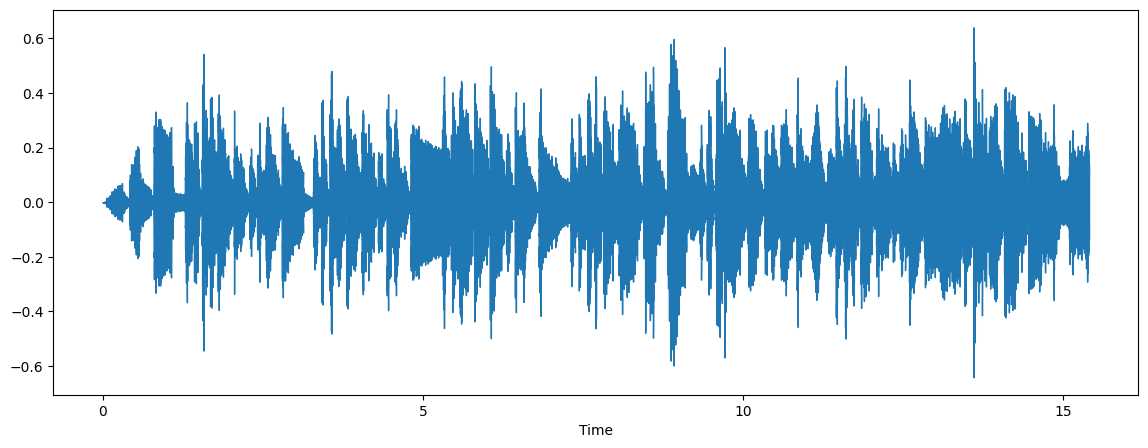

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr);#upper and left-different channels,44100 each second

`librosa.display` is used to display the audio files in different formats such as wave plot, spectrogram, or colormap. Waveplots let us know the loudness of the audio at a given time. Spectogram shows different frequencies playing at a particular time along with it’s amplitude. Amplitude and frequency are important parameters of the sound and are unique for each audio. `librosa.display.waveplot` is used to plot waveform of amplitude vs time where the first axis is an amplitude and second axis is time.

### Spectrogram

`.stft` converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. `.specshow` is used to display spectogram.

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

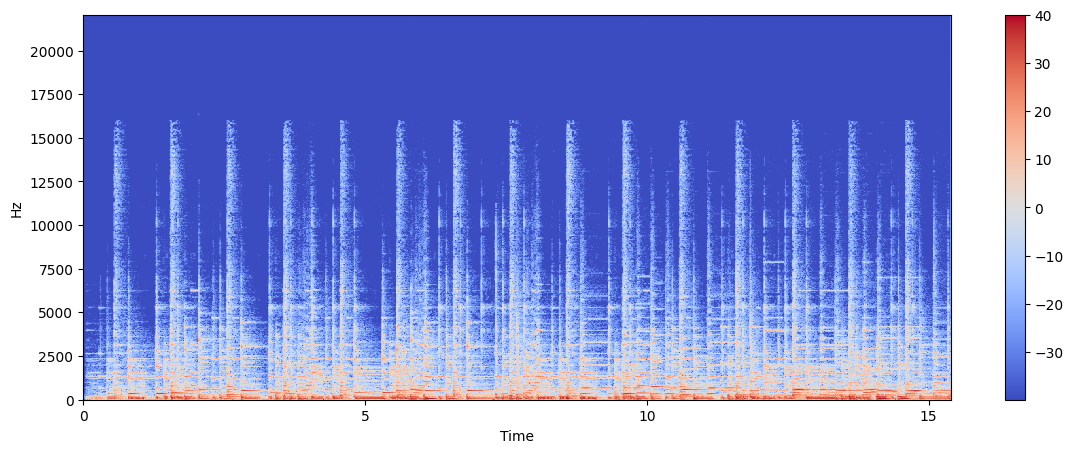

In [ ]:
#Display Spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

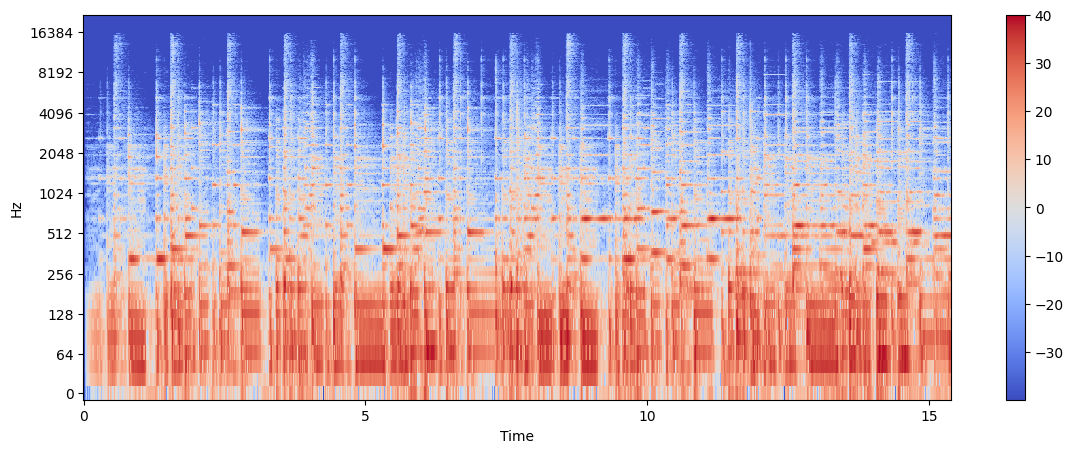

In [ ]:
#Display using a log(frequencies) instead of frequencies
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

## Feature extraction
### Zero crossing rate

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

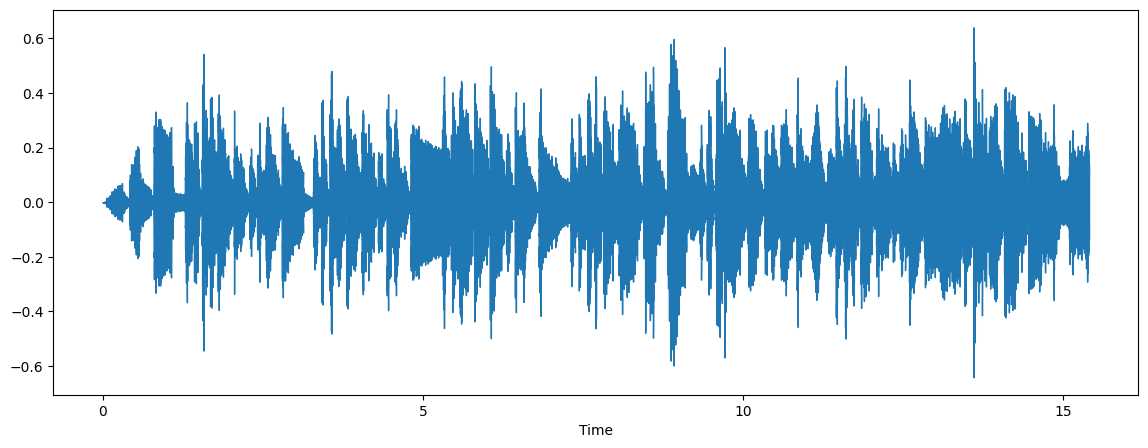

In [ ]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr);

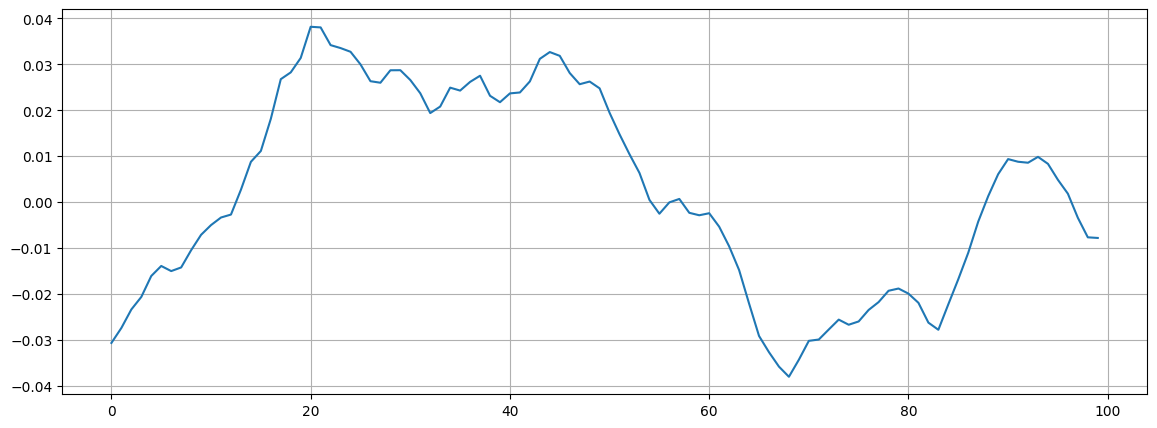

In [ ]:
# Zooming in
n0 = 29000
n1 = 29100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid();

As we can see there are **six** zero crossings in the given graph.

We can also calculate zero crossings using a given code:

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


### Spectral Centroid

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.

In [26]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r');

TypeError: ignored

`.spectral_centroid` is used to calculate the spectral centroid for each frame. So it’ll return an array with columns equal to a number of frames present in your sample.

`.frames_to_time` converts frame to time. `time[i] == frame[i]`.

We’re normalizing so that we can visualize data easily.

Similar to the zero crossing rate, there is a spurious rise in spectral centroid at the beginning of the signal. That is because the silence at the beginning has such small amplitude that high-frequency components have a chance to dominate.

### Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

It also gives results for each frame.

`.spectral_rolloff` is used to calculate rolloff for a given frame.

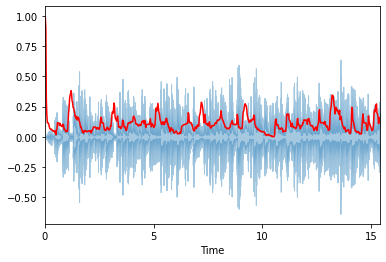

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

### MFCC — Mel-Frequency Cepstral Coefficients

This feature is one of the most important method to extract a feature of an audio signal and is used in the majority of works in audio signals.

MFCCs are increasingly finding uses in music information retrieval applications such as genre classification, audio similarity measures, etc.

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

`.mfcc` is used to calculate mfccs of a signal.

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

to distinguish the mode of song

(20, 1327)


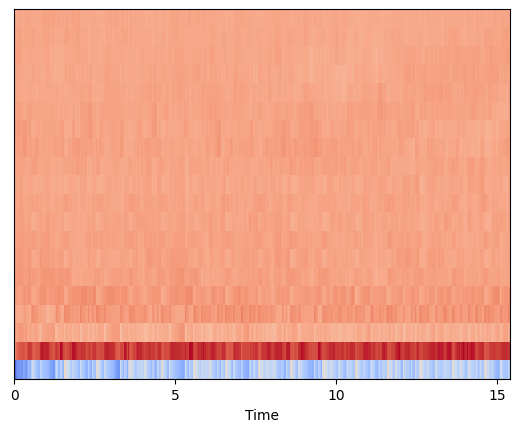

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)#signal rate=sr
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

Now, we have extracted the features of music signals. We can use this feature extracted in various use cases such as classification into different genres.